In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [21]:
# 데이터 불러오기
data = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [37]:
missing_values = data.isnull().sum()
missing_values

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [44]:
def remove_outliers(df, threshold=3):
    """
    각 특성에서 이상치를 확인하고 제거하는 함수

    Parameters:
    - df (DataFrame): 이상치를 제거할 데이터프레임
    - threshold (int or float): 이상치를 판단하기 위한 임계값 (기본값: 3)

    Returns:
    - cleaned_df (DataFrame): 이상치가 제거된 데이터프레임
    """
    cleaned_df = df.copy()
    
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):  # 숫자 타입인 열만 처리
            mean = df[column].mean()
            std = df[column].std()
            z_scores = (df[column] - mean) / std
            outliers = (z_scores.abs() > threshold)
            cleaned_df = cleaned_df[~outliers]
    
    return cleaned_df


In [45]:
# 이상치 제거 함수 호출 (임계값을 지정하지 않으면 기본값인 3 사용)
cleaned_data = remove_outliers(data)

# 이상치가 제거된 데이터프레임 출력
print(cleaned_data)


       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2494  79755   1146.431           470.3888           217.8296        80649   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0       

c:\Users\OWNER\miniconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [46]:
X = cleaned_data.drop('Class', axis=1)
y = cleaned_data['Class']

In [47]:
# Min-Max 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Z 점수 정규화
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X)


Accuracy: 0.8553719008264463


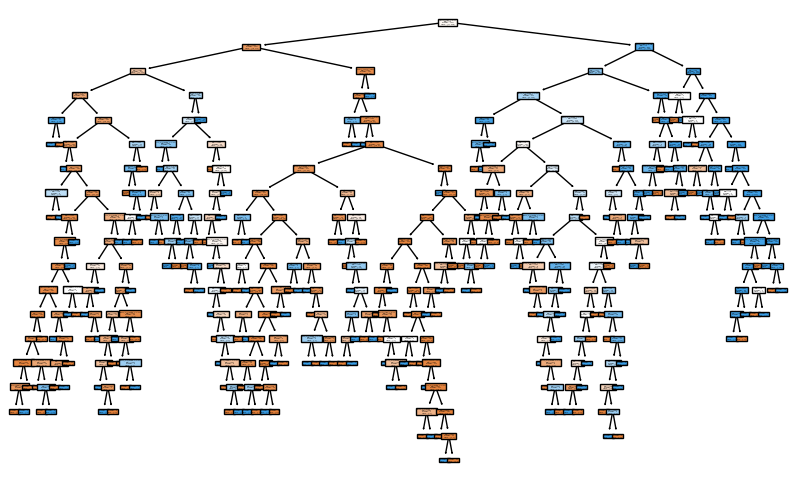

Accuracy: 0.9028925619834711
Accuracy: 0.8966942148760331
Accuracy: 0.890495867768595


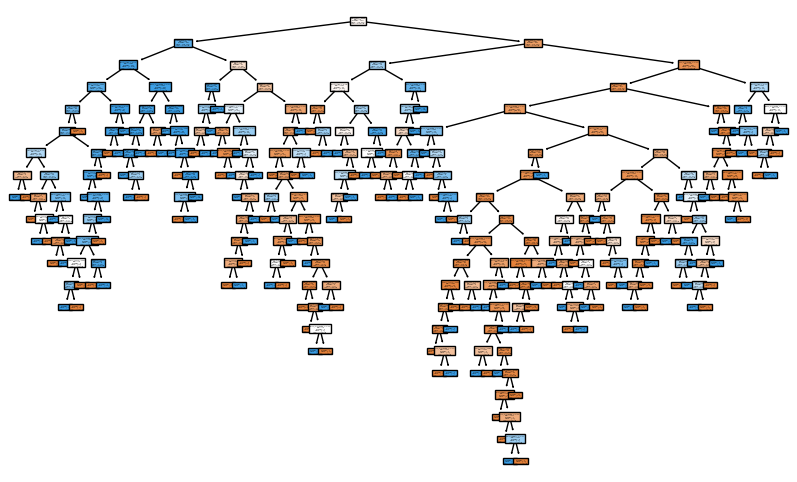

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plot_tree(clf1, filled=True, feature_names=X.columns)
plt.show()

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
clf3 = SVC()
clf3.fit(X_train, y_train)
clf4 = LogisticRegression()
clf4.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

estimator = clf2.estimators_[0]  # 첫 번째 결정 트리 선택
plt.figure(figsize=(10, 6))
plot_tree(estimator, filled=True, feature_names=X.columns, class_names=data.Class)
plt.show()

Accuracy: 0.8636363636363636


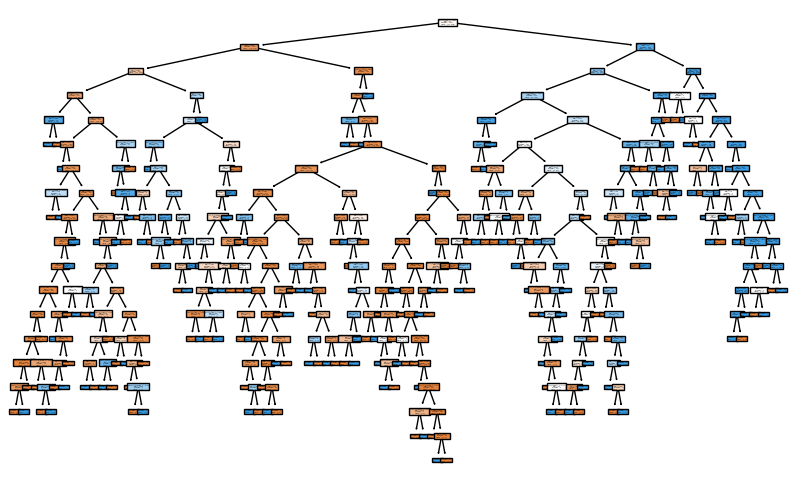

Accuracy: 0.8925619834710744
Accuracy: 0.8966942148760331
Accuracy: 0.8987603305785123


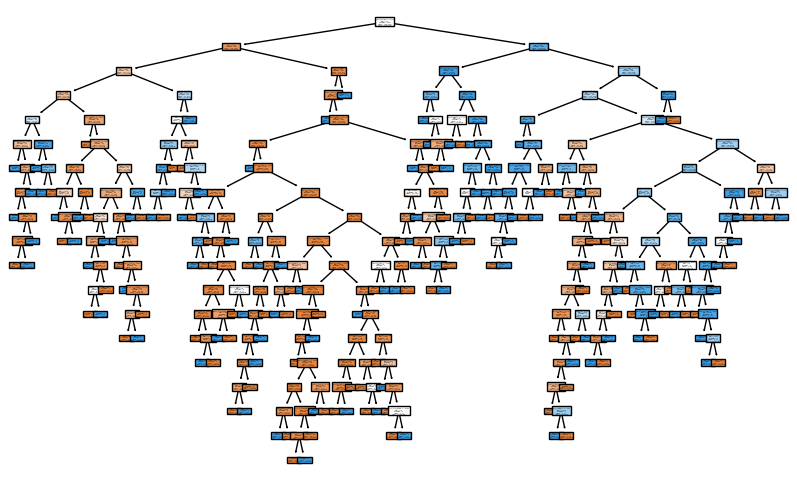

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=42)

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plot_tree(clf1, filled=True, feature_names=X.columns)
plt.show()

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
clf3 = SVC()
clf3.fit(X_train, y_train)
clf4 = LogisticRegression()
clf4.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

estimator = clf2.estimators_[0]  # 첫 번째 결정 트리 선택
plt.figure(figsize=(10, 6))
plot_tree(estimator, filled=True, feature_names=X.columns, class_names=data.Class)
plt.show()